In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import time
from qiskit.providers.aer import QasmSimulator
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
#from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
import qiskit.circuit.library
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import XGate, SXGate, IGate, CCXGate, SGate
from datetime import datetime


# For simulation
from qiskit.providers.aer import AerSimulator

In [2]:
from qiskit import IBMQ
#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <AccountProvider for IBMQ(hub='qc-spring-22-4', group='group-4', project='recdZ7NwFc2tUZtMH')>]

In [3]:
provider=IBMQ.providers()[3]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibmq_belem')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_belem is on version 1.0.42. It has 5 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]] are the list of connected qubits.ibmq_belem can handle maximum 100 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


# 1Q IRB on Belem (3) 
- X
- SX
- I
- Delay



ibmq_belem
2022-05-27 13:04:27.913420


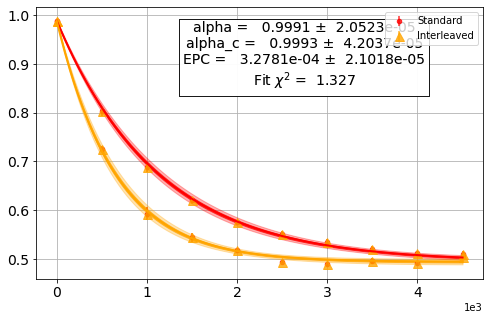

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.49495253541151646, 0.9991063212033706, 0.9993443862640486, 0.49386699980997645]
- χ²: 1.3266823776523624
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.999106+/-0.000021
- χ²: 1.3266823776523624
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.99934+/-0.00004
- χ²: 1.3266823776523624
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000328+/-0.000021
- χ²: 1.3266823776523624
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [21]:
# **XGate 
lengths = np.arange(1, 5000, 500)
num_samples = 10
seed = 1010
qubits = [3]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

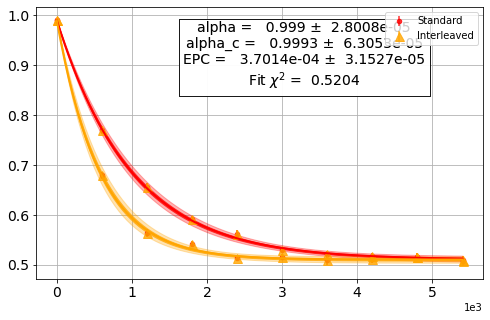

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48089415845048944, 0.9989913446831096, 0.9992597105048835, 0.5103202103286593]
- χ²: 0.5204345711726451
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.998991+/-0.000028
- χ²: 0.5204345711726451
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.99926+/-0.00006
- χ²: 0.5204345711726451
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000370+/-0.000032
- χ²: 0.5204345711726451
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [4]:
# **XGate 0524
lengths = np.arange(1, 6000, 600)
num_samples = 10
seed = 1010
qubits = [3]
int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)
# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

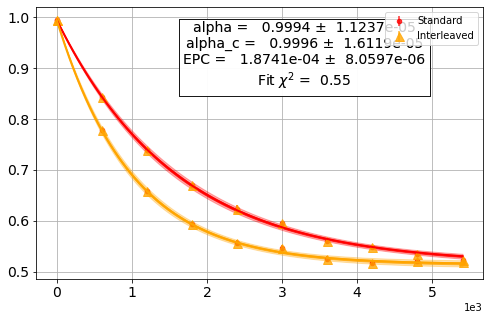

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4804458510908598, 0.9993717304111575, 0.9996251736478269, 0.5140892545908974]
- χ²: 0.5499679020142243
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.999372+/-0.000011
- χ²: 0.5499679020142243
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.999625+/-0.000016
- χ²: 0.5499679020142243
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000187+/-0.000008
- χ²: 0.5499679020142243
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [7]:
# ** SXGate IRB 0524
lengths = np.arange(1,6000, 600)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 3

int_exp1 = InterleavedRB(circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

ibmq_belem
IGate
2022-05-27 18:21:05.460698


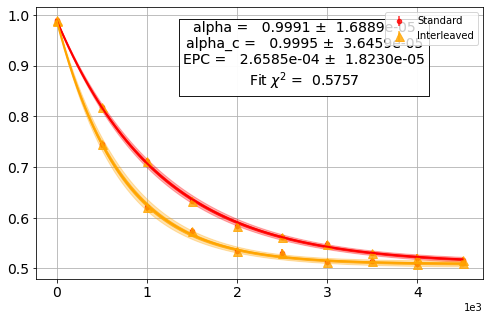

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4806565376457738, 0.9991181030150483, 0.9994682953157087, 0.5089879113381375]
- χ²: 0.5756705646642869
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.999118+/-0.000017
- χ²: 0.5756705646642869
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.99947+/-0.00004
- χ²: 0.5756705646642869
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000266+/-0.000018
- χ²: 0.5756705646642869
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [31]:
# ** IGate
lengths = np.arange(1, 5000, 500)
num_samples = 10
seed = 1010
qubits = [3]
print(backend)
print('IGate')
print(datetime.today())

# Run an Interleaved RB experiment on qubit 3

int_exp1 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

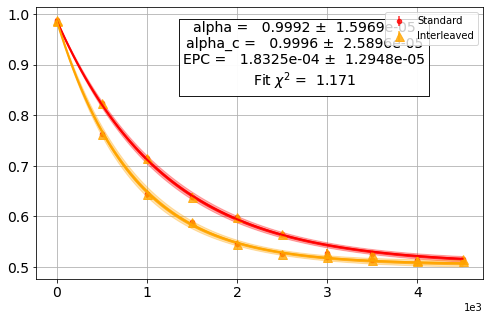

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48217349005408233, 0.999156574635759, 0.9996335099170822, 0.5054625162226912]
- χ²: 1.1705380446171496
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.999157+/-0.000016
- χ²: 1.1705380446171496
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.999634+/-0.000026
- χ²: 1.1705380446171496
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000183+/-0.000013
- χ²: 1.1705380446171496
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [7]:
# ** IGate
lengths = np.arange(1, 5000, 500)
num_samples = 10
seed = 1010
qubits = [3]

# Run an Interleaved RB experiment on qubit 3

int_exp1 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

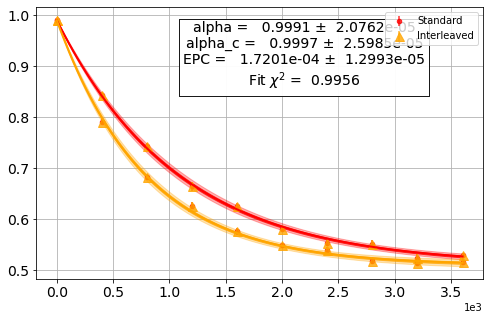

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4811904992022257, 0.9990758072391687, 0.9996559740944686, 0.50953057035484]
- χ²: 0.9955719914132782
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.999076+/-0.000021
- χ²: 0.9955719914132782
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.999656+/-0.000026
- χ²: 0.9955719914132782
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000172+/-0.000013
- χ²: 0.9955719914132782
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [5]:
# ** IGate
lengths = np.arange(1, 4000, 400)
num_samples = 10
seed = 1010
qubits = [3]

# Run an Interleaved RB experiment on qubit 3

int_exp1 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

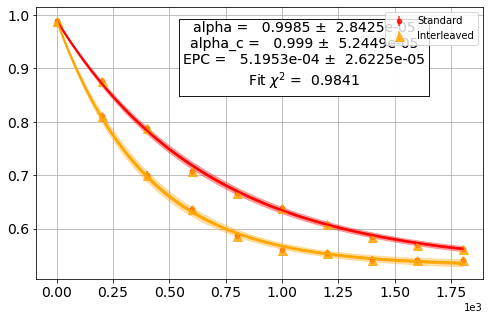

ibmq_belem
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4594186002626882, 0.9985115195164469, 0.9989609491946702, 0.5310196843773508]
- χ²: 0.9840748865609442
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha
- value: 0.998512+/-0.000028
- χ²: 0.9840748865609442
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: alpha_c
- value: 0.99896+/-0.00005
- χ²: 0.9840748865609442
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
ibmq_belem
DbAnalysisResultV1
- name: EPC
- value: 0.000520+/-0.000026
- χ²: 0.9840748865609442
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [9]:
# ** IGate
lengths = np.arange(1, 2000, 200)
num_samples = 10
seed = 1010
qubits = [3]

# Run an Interleaved RB experiment on qubit 3

int_exp1 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(backend)
    print(result)

ibmq_belem
2022-05-27 17:54:37.643812


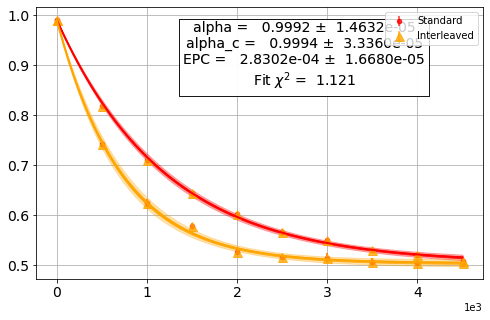

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48735836730254095, 0.9991706941657335, 0.9994339651980939, 0.5035078420049389]
- χ²: 1.1213880856480367
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999171+/-0.000015
- χ²: 1.1213880856480367
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999434+/-0.000033
- χ²: 1.1213880856480367
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000283+/-0.000017
- χ²: 1.1213880856480367
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [30]:
# ** 1q Delay
lengths = np.arange(1, 5000, 500)
num_samples = 10
seed = 1010
qubits = [3]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 3
# add the reason for 160dt
duration=backend.properties().gate_length('x',3)/backend.configuration().dt
interleaved_element = Delay(duration, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

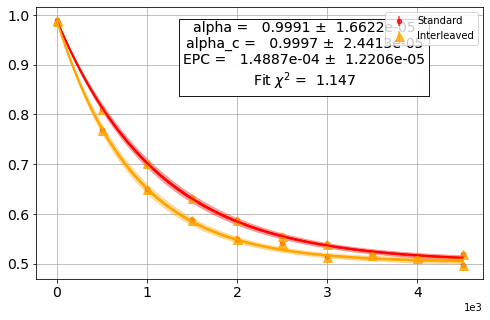

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4869098329305482, 0.9991087396166327, 0.9997022617453154, 0.5030642906632169]
- χ²: 1.1474453112618863
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999109+/-0.000017
- χ²: 1.1474453112618863
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999702+/-0.000024
- χ²: 1.1474453112618863
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000149+/-0.000012
- χ²: 1.1474453112618863
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [6]:
# ** 1q Delay
lengths = np.arange(1, 5000, 500)
num_samples = 10
seed = 1010
qubits = [3]

# Run an Interleaved RB experiment on qubit 3
# add the reason for 160dt
duration=backend.properties().gate_length('x',3)/backend.configuration().dt
interleaved_element = Delay(duration, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

# 2q IRB
- CX([3,4])
- Delay([3,4])
## belem_q3,4_CX<DD

ibmq_belem
2022-05-27 15:09:13.317492


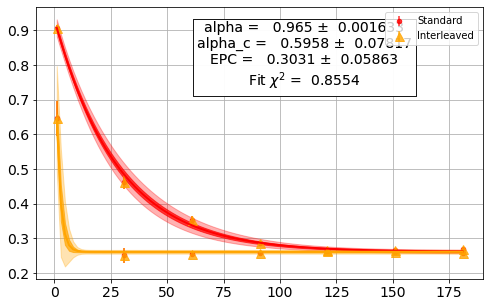

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6699979969360342, 0.9650205961799679, 0.5958485532476887, 0.2610006863952416]
- χ²: 0.8554092486669631
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9650+/-0.0016
- χ²: 0.8554092486669631
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.60+/-0.08
- χ²: 0.8554092486669631
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.30+/-0.06
- χ²: 0.8554092486669631
- quality: good
- extra: <3 items>
- device_components: ['Q3', 'Q4']
- verified: False


In [27]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [3,4]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(3,4))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[3,4], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_belem
2022-05-27 11:18:35.627970


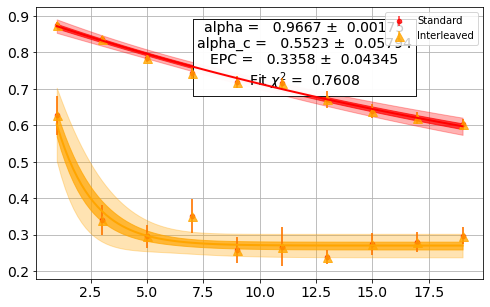

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6223248641803648, 0.9667065403481735, 0.5522821790319342, 0.2703748960957289]
- χ²: 0.7608427586845139
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9667+/-0.0018
- χ²: 0.7608427586845139
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.55+/-0.06
- χ²: 0.7608427586845139
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.34+/-0.04
- χ²: 0.7608427586845139
- quality: good
- extra: <3 items>
- device_components: ['Q3', 'Q4']
- verified: False


In [15]:
lengths = np.arange(1, 20, 2)
num_samples = 10
seed = 1010
qubits = [3,4]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(3,4))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[3,4], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_belem
2022-05-27 11:11:49.275614


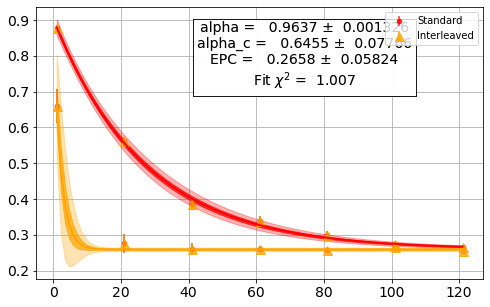

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6431373152706099, 0.9637491769408856, 0.6455381852918327, 0.25921101522729295]
- χ²: 1.0066284222928508
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9637+/-0.0013
- χ²: 1.0066284222928508
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.65+/-0.08
- χ²: 1.0066284222928508
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.27+/-0.06
- χ²: 1.0066284222928508
- quality: good
- extra: <3 items>
- device_components: ['Q3', 'Q4']
- verified: False


In [14]:
lengths = np.arange(1, 140, 20)
num_samples = 10
seed = 1010
qubits = [3,4]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(3,4))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[3,4], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_belem


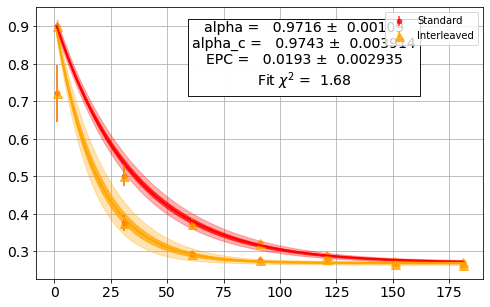

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6491396911203314, 0.971577558969291, 0.9742657864593338, 0.2693577111143374]
- χ²: 1.6801389955947414
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9716+/-0.0011
- χ²: 1.6801389955947414
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.974+/-0.004
- χ²: 1.6801389955947414
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0193+/-0.0029
- χ²: 1.6801389955947414
- quality: good
- extra: <3 items>
- device_components: ['Q3', 'Q4']
- verified: False


In [22]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [3,4]
print(backend)

duration=backend.properties().gate_length('cx',(3,4))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[3,4], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# Coherence limited error

In [16]:
date= datetime.today()
qubit='belem_q34'
belem_q34=RBUtils.coherence_limit_error(2, 
backend.properties().gate_length('cx',(3,4)),
 t1s=[backend.properties().t1(3),backend.properties().t1(4)], 
 t2s=[backend.properties().t1(3),backend.properties().t1(4)])
print('CX error=0.0110, DD error=0.0193 on 5/24, CX error=0.0115, DD error=0.3 on 5/27')
print(f'{qubit} CLE is {belem_q34} on {date}')

CX error=0.0110, DD error=0.0193 on 5/24, CX error=0.0115, DD error=0.3 on 5/27
belem_q34 CLE is 0.008904717130802986 on 2022-05-29 13:05:33.800686


### CLE(0.008)<CX(0.0113)<2qDelay(0.0193)